In [4]:
import nest_asyncio # para correr Stan en un Jupyter Notebook
nest_asyncio.apply()

In [1]:
import pymc as pm
import arviz as az
import seaborn as sns
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
from IPython.display import display, Markdown 
import numpy as np
import load_covid_data
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

sampler_kwargs = {'chains': 4, 'cores': 4, 'return_inferencedata': True}

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


In [3]:
# Datos-COVID19/output/producto49/Positividad_Diaria_Media_T.csv
# positivity is casos pcr/pcr
meandpos = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto49/Positividad_Diaria_Media_T.csv')
meandpos['Fecha'] = pd.to_datetime(meandpos['Fecha'], format = '%Y-%m-%d')
meandpos = meandpos[meandpos['Fecha']>'2022-01']
meandpos['pcr'] = meandpos['pcr'].astype(int)
meandpos['casos pcr'] = meandpos['casos pcr'].astype(int)
meandpos['casos ag'] = meandpos['casos ag'].astype(int)

### Gráfico de positividad

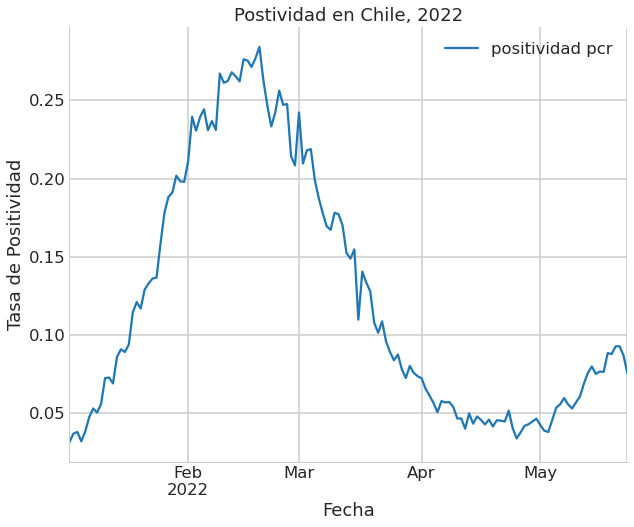

In [16]:
df = meandpos[['Fecha','positividad pcr']]
df.set_index('Fecha', inplace= True)
fig, ax = plt.subplots(figsize = (10,8))
df.plot(ax=ax)
ax.set(ylabel= 'Tasa de Positividad', title = 'Postividad en Chile, 2022')
sns.despine()

### Casos PCR

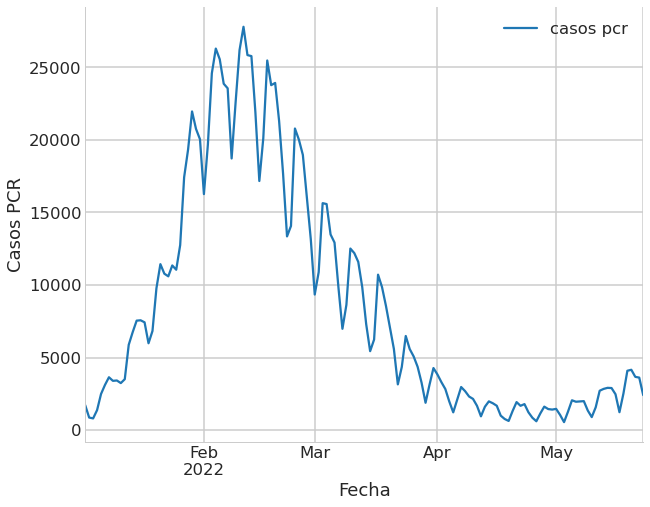

In [15]:
df = meandpos[['Fecha','casos pcr']]
df.set_index('Fecha', inplace= True)
fig, ax = plt.subplots(figsize = (10,8))
df.plot(ax=ax)
ax.set(ylabel= 'Casos PCR')
sns.despine()

In [ ]:


with pm.Model() as model_expl:
    #Intercepto
    a = pm.Normal('a', mu = 0.5, sigma = 0.5)

    #Pendiente
    b = pm.Normal('b', mu = 0.2, sigma = 0.2)

    #Regresion
    positividad = a